In [1]:
import glmnet_python
import h5py
import matplotlib.pyplot as plt
import numpy as np

from cvglmnet import cvglmnet
from cvglmnetCoef import cvglmnetCoef
from neuropacks import PVC11
from pyuoi.linear_model import UoI_Poisson
from pyuoi.utils import log_likelihood_glm
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
pvc11 = PVC11(data_path='/Volumes/pss/data/pvc11/data/spikes_gratings/data_monkey1_gratings.mat')
Y = pvc11.get_response_matrix(transform=None)
labels = (pvc11.get_design_matrix(form='angle') / 30).astype('int')

In [5]:
neuron = 10
X = np.delete(Y, neuron, axis=1)
y = Y[:, neuron]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=labels, shuffle=True)

In [10]:
fit = cvglmnet(x=X_train, y=y_train, family='poisson', nfolds=10, standardize=True)

In [7]:
coefs = cvglmnetCoef(fit, s = 'lambda_min').ravel()
intercept = coefs[0]
coef = coefs[1:]

array([ 0.01858607,  0.        ,  0.        ,  0.00204477,  0.        ,
        0.        , -0.00523075,  0.00849651,  0.00468909,  0.        ,
        0.01853961,  0.18265678,  0.01786114,  0.        , -0.00513687,
        0.00385321,  0.        ,  0.        , -0.00055879,  0.00471163,
        0.00210427,  0.        , -0.00186132,  0.        ,  0.        ,
        0.        ,  0.01927846,  0.        , -0.00439384,  0.00044384,
        0.03653549,  0.00653035,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0036055 ,  0.01953495,
        0.        ,  0.00473205,  0.        ,  0.00547749,  0.01323132,
        0.        ,  0.        ,  0.        ,  0.0086031 ,  0.        ,
        0.00297093,  0.        ,  0.        , -0.00647585,  0.0011644 ,
        0.01396118, -0.00826739,  0.        ,  0.        ,  0.        ,
       -0.08355661,  0.        ,  0.00250176,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.01001308,  0.  

In [6]:
poisson = UoI_Poisson(
    n_boots_sel=50,
    n_boots_est=50,
    n_lambdas=50,
    warm_start=False,
    estimation_score='log',
    eps=1e-5
)

In [7]:
poisson.fit(X_train, y_train)

UoI_Poisson(alphas=array([1.]), comm=None, copy_X=None, eps=1e-05,
            estimation_frac=0.8, estimation_score='log', fit_intercept=True,
            logger=None, max_iter=None, n_boots_est=50, n_boots_sel=50,
            n_lambdas=50,
            random_state=<module 'numpy.random' from '/Users/psachdeva/anaconda3/lib/python3.6/site-packages/numpy/random/__init__.py'>,
            selection_frac=0.8, solver=None, stability_selection=1.0,
            standardize=True, tol=None, warm_start=False)

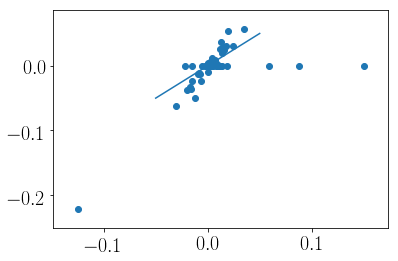

In [8]:
plt.scatter(coef, poisson.coef_)
plt.plot([-0.05, .05], [-.05, .05])

In [12]:
mu_glm = np.exp(intercept + np.dot(X_test, coef))
# mu_uoi = np.exp(poisson.intercept_ + np.dot(X_test, poisson.coef_))

In [21]:
nz_y = y_test != 0
deviance_glmnet = np.sum(y_test[nz_y] * np.log(y_test[nz_y])) - np.sum(y_test * np.log(mu_glm)) - np.sum(y_test - mu_glm)
# deviance_uoi = np.sum(y_test[nz_y] * np.log(y_test[nz_y])) - np.sum(y_test * np.log(mu_uoi)) - np.sum(y_test - mu_uoi)

In [18]:
        ll = np.mean(y_true * np.log(y_pred) - y_pred)


480

In [27]:
print(deviance_glmnet)
print(deviance_uoi)

270.00599343803907


NameError: name 'deviance_uoi' is not defined

In [12]:
print(log_likelihood_glm('poisson', y_test, mu_glm))
print(log_likelihood_glm('poisson', y_test, mu_uoi))

-0.6777826670745044
-0.7169570618354342


In [13]:
print(np.count_nonzero(poisson.coef_))
print(np.count_nonzero(coef))

29
52


In [30]:
133 * log_likelihood_glm('poisson', y_test[nz_y], y_test[nz_y]) - 480 * log_likelihood_glm('poisson', y_test, mu_glm)

270.0059934380391

In [29]:
y_test[nz_y].size

133

In [17]:
poisson.rp_max_idx_

array([18, 20, 14, 20, 15, 13, 12, 18, 20, 13, 19, 19, 24, 18, 11, 13, 17,
       12, 21,  8, 15, 21,  9, 15,  8,  3,  6, 11, 13, 17,  8, 12, 11, 11,
       15, 13, 12, 14, 19, 20, 21, 17, 15, 15, 11, 23,  8, 15, 15, 19])